In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.3)
sns.set_style('white')
mpl.rcParams['text.usetex'] = True

In [2]:
from polara.recommender.data import RecommenderData
from polara.recommender.models import CoffeeModel
from polara.tools.movielens import get_movielens_data
from polara.tools.printing import print_frames

In [3]:
ml_data, ml_genres = get_movielens_data(local_file="ml-1m.zip", get_genres=True)

In [4]:
rating_model_data = RecommenderData(ml_data, 'userid', 'movieid', 'rating')

In [5]:
rating_model_data.holdout_size = 1
rating_model_data.random_holdout = False
# rating_model_data.test_ratio = 0.000017
rating_model_data.update()

Preparing data


In [6]:
rating_model_data.get_configuration()

{'holdout_size': 1,
 'negative_prediction': False,
 'permute_tops': False,
 'random_holdout': False,
 'shuffle_data': False,
 'test_fold': 5,
 'test_ratio': 0.2,
 'test_sample': None}

In [7]:
coffee = CoffeeModel(rating_model_data)
coffee.build()

CoFFee model training time: 1.98389791159s


In [8]:
core, v, w = coffee._core, coffee._items_factors, coffee._feedback_factors

In [9]:
print v.shape, w.shape

(3687L, 10L) (5L, 2L)


In [10]:
ml_genres[ml_genres.movienm.str.lower().str.contains('pulp fiction')]

,movieid,movienm,genreid
507,296,Pulp Fiction (1994),Crime
508,296,Pulp Fiction (1994),Drama


In [11]:
rating_model_data.index.itemid.query('old == 296')

,new,old
285,285,296


In [12]:
rating_model_data.index.feedback.T

,0,1,2,3,4
new,0,1,2,3,4
old,1,2,3,4,5


In [13]:
p = np.zeros((v.shape[0], w.shape[0]))
p[285, 4] = 1

In [14]:
r = v.dot(v.T.dot(p.dot(w).dot(w.T)))

In [15]:
colors = ['white',
          'light blue grey',
          'grey blue',
          'dark slate blue',
          'dark blue grey']
custom_colors = [colors[i] for i in [4, 2, 0, 2, 3, 4, 1, 2, 3, 1, 3, 1, 4, 1]]
cmap = mpl.colors.ListedColormap(sns.xkcd_palette(custom_colors))

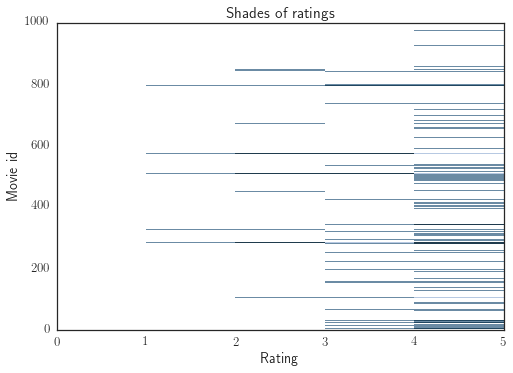

In [16]:
plt.title('Shades of ratings')
plt.xlabel('Rating')
plt.ylabel('Movie id')
plt.ylim([0, 1000])

plt.pcolor(r, cmap=cmap)

In [17]:
# plt.savefig("shades.pdf")
# plt.show()
# plt.close()
# plt.clf()